In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## For this project, I analyzed a NASA Meteorite Landings dataset and created the following visuals:

* Plot 1 - Multi-Faceted Bar Plot
* Plot 2 - Multi-Faceted Count Plot
* Plot 3 - Heatmap
* Plot 4 - Boxplot
* Plot 5 - Proportion Plot - Pie Plot
* Plot 6 - Scatter Plot
* Plot 7 - Line Plot

For me, this was an incredibly fascinating dataset to work with and I felt it had a lot to teach through both the visual/historical insights it offered as well as through matters pertaining to the subject material itself.

If you seek to recreate this project or are curious about analyzing the dataset further for yourself, feel free to download it as a CSV from my Github @ github.com/mdorazio33

In [3]:
plt.style.use('ggplot')
sns.set_style('whitegrid')

## Loading the dataset with pd.read_csv

Like any other project, the first step when working with CSV files in python is to read them in Pandas. Here, I read the Meteorite_Landings_Dataset CSV from the location on my local machine within the visual_analytics folder as shown in the file path.

In [4]:
meteorite_csv_filepath = 'C:/projects/Meteorite_Landings_Dataset.csv'
meteorite_csv_filepath

'C:/projects/Meteorite_Landings_Dataset.csv'

In [5]:
meteorite_df = pd.read_csv(meteorite_csv_filepath)
meteorite_df

,id,name,class,mass (g),mass (kg),fall,year,latitude,longitude,GeoLocation
0,16988,Nogata,L6,472.0,0.4720,Fell,860,33.72500,130.75000,"(33.725, 130.75)"
1,7823,Elbogen,"Iron, IID",107000.0,107.0000,Fell,1399,50.18333,12.73333,"(50.18333, 12.73333)"
2,22614,Rivolta de Bassi,Stone-uncl,103.3,0.1033,Fell,1490,45.48333,9.51667,"(45.48333, 9.51667)"
3,10039,Ensisheim,LL6,127000.0,127.0000,Fell,1491,47.86667,7.35000,"(47.86667, 7.35)"
4,5247,Campo del Cielo,"Iron, IAB-MG",50000000.0,50000.0000,Found,1575,-27.46667,-60.58333,"(-27.46667, -60.58333)"
...,...,...,...,...,...,...,...,...,...,...
31906,55529,Sutter's Mill,C,992.5,0.9925,Fell,2012,38.80389,-120.90806,"(38.80389, -120.90806)"
31907,57454,Mandalay Spring,L6,2854.0,2.8540,Found,2012,40.89201,-118.55319,"(40.89201, -118.55319)"
31908,56133,Battle Mountain,L6,2900.0,2.9000,Fell,2012,40.66813,-117.18913,"(40.66813, -117.18913)"
31909,57338,Los Vientos 028,H~5,12110.0,12.1100,Found,2012,-24.68333,-69.76667,"(-24.68333, -69.76667)"


From the original meteorite_df, my first step was to create a melted dataframe, df_melted for use in later visualizations throughout this project.

In [6]:
df_melted = pd.melt(meteorite_df, id_vars=['year', 'class'], value_vars=['mass (kg)'], var_name=None, value_name='mass in kg')
df_melted = df_melted.drop('variable', axis=1)
df_melted

,year,class,mass in kg
0,860,L6,0.4720
1,1399,"Iron, IID",107.0000
2,1490,Stone-uncl,0.1033
3,1491,LL6,127.0000
4,1575,"Iron, IAB-MG",50000.0000
...,...,...,...
31906,2012,C,0.9925
31907,2012,L6,2.8540
31908,2012,L6,2.9000
31909,2012,H~5,12.1100


In order to understand exactly what I was working with, I wanted to find out just how many unique classes existed in this dataset. Figuring out this number was a part of my thought process, as it allowed me to figure out just how much I needed to filter my dataset depending on the visualizations I was making for each plot.

In [7]:
unique_classifiers = df_melted['class'].str.split(', ', expand=True).stack().unique()
print(len(unique_classifiers))

389


The resultant total number of unique meteorite classes was 389.

## Plot #1 - Multi-Faceted Bar Plot

For the first plot in this project, I decided to create a Multi-Faceted Horizontal Bar Plot showcasing the average masses of the top 12 most frequently observed meteorite classes across a multitude of decades.

To do this, the first step was to get the top 12 classifiers, then create a new dataframe to store them in.

In [8]:
classifiers_counts = df_melted['class'].str.split(', ', expand=True).stack().value_counts()

top_classifiers = classifiers_counts.head(12)

print(top_classifiers)

L6       6523
H5       5586
H4       3324
H6       3231
L5       2723
LL5      1897
LL6       963
Iron      928
L4        799
H4/5      380
CM2       279
IIIAB     266
Name: count, dtype: int64


In [9]:
class_counts = df_melted['class'].str.split(', ', expand=True).stack().value_counts()

top_12 = class_counts.head(12).index.tolist()

df_melted12 = df_melted[df_melted['class'].isin(top_12)]

df_melted12

,year,class,mass in kg
0,860,L6,0.472
3,1491,LL6,127.000
7,1621,Iron,1.967
12,1668,H6,0.040
17,1723,L5,0.039
...,...,...,...
31902,2012,LL6,0.212
31904,2012,H4,0.754
31907,2012,L6,2.854
31908,2012,L6,2.900


Next, I ordered the data from years to 10-year periods to represent decades and then determine the average meteorite mass for classes within those periods.

In [10]:
df_melted12 = df_melted.copy()
df_melted12.loc[:, 'period'] = (df_melted12['year'] // 10) * 10

In [11]:
df_avg_mass = df_melted12.groupby(['period', 'class'])['mass in kg'].mean().reset_index(name='average_mass')
df_avg_mass

,period,class,average_mass
0,860,L6,0.472000
1,1390,"Iron, IID",107.000000
2,1490,LL6,127.000000
3,1490,Stone-uncl,0.103300
4,1570,"Iron, IAB-MG",50000.000000
...,...,...,...
1470,2010,L~6,0.401364
1471,2010,Martian (shergottite),3.118660
1472,2010,Mesosiderite,0.203300
1473,2010,Mesosiderite-C2,5.026000


The resulting dataframe was df_avg_mass which was then used to create the multi-faceted bar plot at a period range from the 1810's to the 2010's.

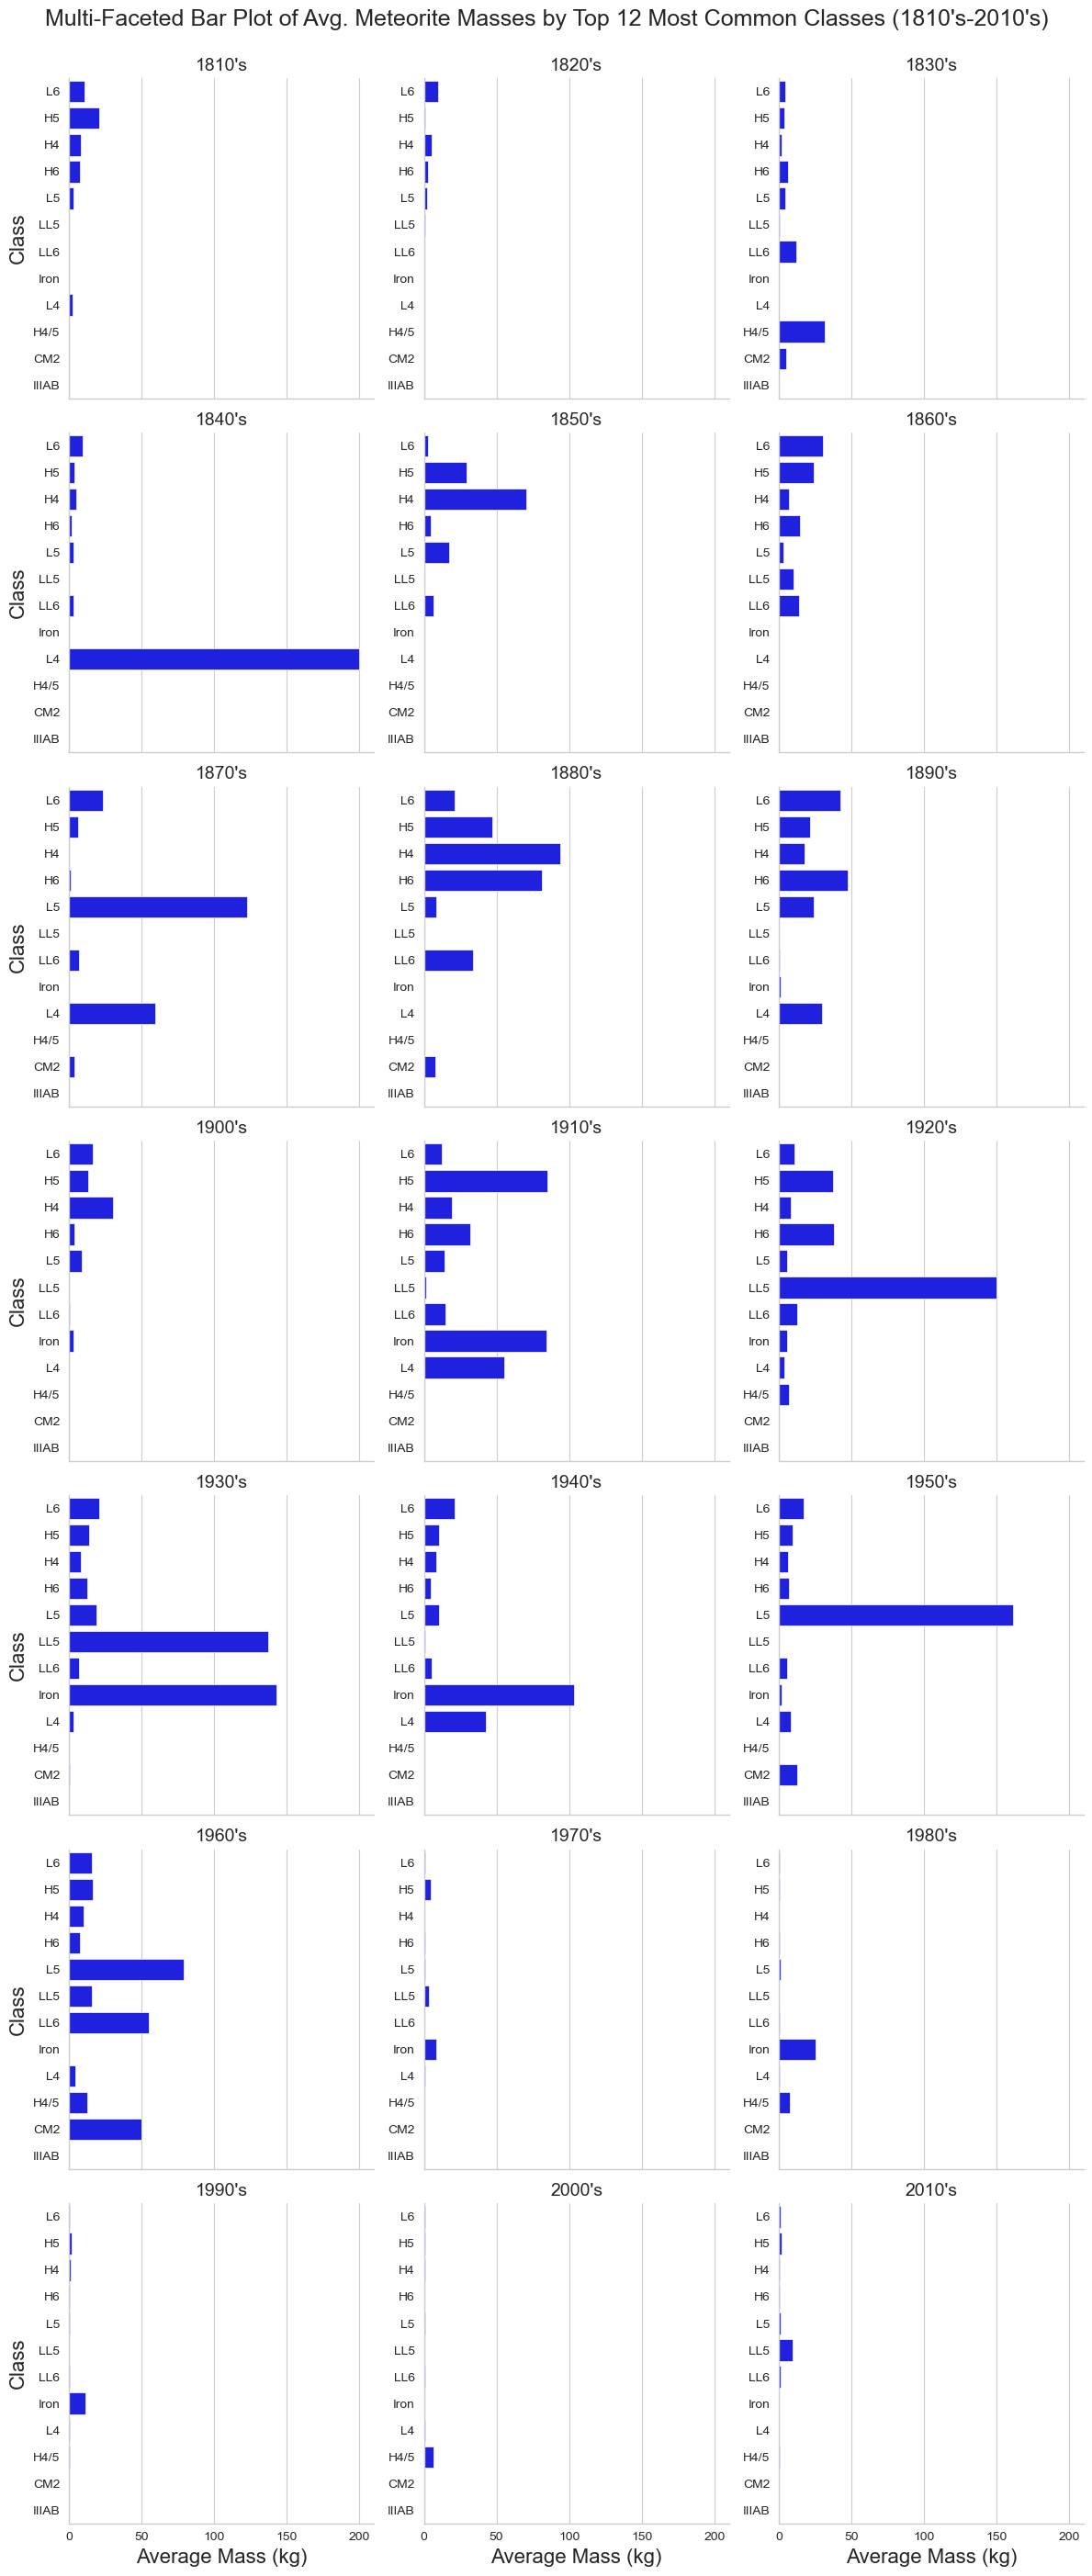

In [12]:
class_order = ["L6", "H5", "H4", "H6", "L5", "LL5", "LL6", "Iron", "L4", "H4/5", "CM2", "IIIAB"]
period_order = range(1810, 2020, 10)

g = sns.FacetGrid(df_avg_mass,
                  col='period',
                  col_order=period_order,
                  col_wrap = 3,
                  height=4,
                  sharey=False)

g.map(sns.barplot, 'average_mass', 'class', order=class_order, color='blue')
g.set_axis_labels('Average Mass (kg)', 'Class', fontsize=16)

period_titles = ["1810's", "1820's", "1830's", "1840's", "1850's", "1860's", "1870's", "1880's", "1890's", "1900's", "1910's",
          "1920's", "1930's", "1940's", "1950's", "1960's", "1970's", "1980's", "1990's", "2000's", "2010's"]

for ax, title in zip(g.axes.flat, period_titles):
    ax.set_title(title, fontsize=14)
    
g.fig.suptitle("Multi-Faceted Bar Plot of Avg. Meteorite Masses by Top 12 Most Common Classes (1810's-2010's)", fontsize=18, y=1)
g.tight_layout()
plt.show()

After the creation of this plot, the massive 200 kg meteorite in the L4 class during the 1840's caught my eye, so I wanted to investigate it further. I queried the original meteorite_df for all L4 meteorites between the years of 1840 and 1849.

In [13]:
y1840_1849df = meteorite_df[(meteorite_df['year'] >= 1840) & (meteorite_df['year'] <= 1849) & (meteorite_df['class'] == 'L4')]

y1840_1849df

,id,name,class,mass (g),mass (kg),fall,year,latitude,longitude,GeoLocation
186,4951,Barratta,L4,200000.0,200.0,Found,1845,-35.3,144.56667,"(-35.3, 144.56667)"


As a result, I found out that the lone meteorite named "Barratta" was responsible for this 200 kg bar in the facet plot. It was found in 1845.

## Multi-Faceted Bar Plot - Explanation

For the Multi-Faceted Bar Plot, I was hoping to find out if meteorites that fall under specific classes are more likely to have greater or smaller masses than those that exist in others. I was also hoping to find out if there were any consistent results to support this across the 200-year time period for which this multi-faceted plot represents.

The graphs actually did not show what I had originally expected, but they showed details that were instead far more interesting. One of these details is that it seems like there were more massive meteorites discovered in past decades than those in comparatively recent history. Also, as far as consistency is concerned, I noticed that when L6 meteorites are discovered, they seem to hover around a similar average mass, being consistently small. As previously mentioned, Barratta really stood out to me due to its 200 kg mass setting it apart from the others in this dataset, as most are relatively less massive by comparison. 

However, as I found out later on in this project, a 200 kg meteorite is nowhere near the most massive that have been historically discovered. Therefore, a key takeaway/conclusion from this graph is actually one that comes about from the nature of how this plot was created in the first place. It was made from a dataframe consisting of the top 12 most common meteorite classes throughout the entire dataset and filtered for decades between the 1810's and the 2010's. This indicates that among the top 12 most common meteorite classes, none are of the particularly supermassive variety as are seen later on in other visualizations later on in this project (particularly Plot #7 - Line Plot). In other words, while I had originally expected there to be a more uniform average for the meteorite classes observed, what I discovered from this graph was something far more insightful about common meteorite classes than I had originally assumed, which is that even the more massive ones are not nearly as enormous as those that can exist in more specific and less common classes.

In other words, the major conclusion from this plot is that based on the average masses for the top 12 common meteorite classes over the past 200+ years, is that most of the meteorites that more commonly fall to Earth are not extremely massive as rarer types have the potential to be. 

## Plot #2 - Multi-Faceted Count Plot

For the second plot in this project, I chose to create a Multi-Faceted count plot. The reason I chose this was because I noticed a "fall" column containing "fell" and "found" for the fall status of the meteorite and wanted to visualize the how many among the top 9 most common meteorite classes fell under this category through individual facets.

In [14]:
columns_to_melt = ['class', 'fall']

df_melted2 = pd.melt(meteorite_df[columns_to_melt], id_vars=['class'], value_vars=['fall'], var_name='variable', value_name='fall_status')
df_melted2 = df_melted2.drop('variable', axis=1)
df_melted2

,class,fall_status
0,L6,Fell
1,"Iron, IID",Fell
2,Stone-uncl,Fell
3,LL6,Fell
4,"Iron, IAB-MG",Found
...,...,...
31906,C,Fell
31907,L6,Found
31908,L6,Fell
31909,H~5,Found


In [15]:
class_counts2 = df_melted2['class'].str.split(', ', expand=True).stack().value_counts()

top_9 = class_counts.head(9).index.tolist()

df_top9 = df_melted2[df_melted2['class'].isin(top_9)]

df_top9

,class,fall_status
0,L6,Fell
3,LL6,Fell
7,Iron,Fell
12,H6,Fell
17,L5,Fell
...,...,...
31902,LL6,Found
31904,H4,Found
31907,L6,Found
31908,L6,Fell


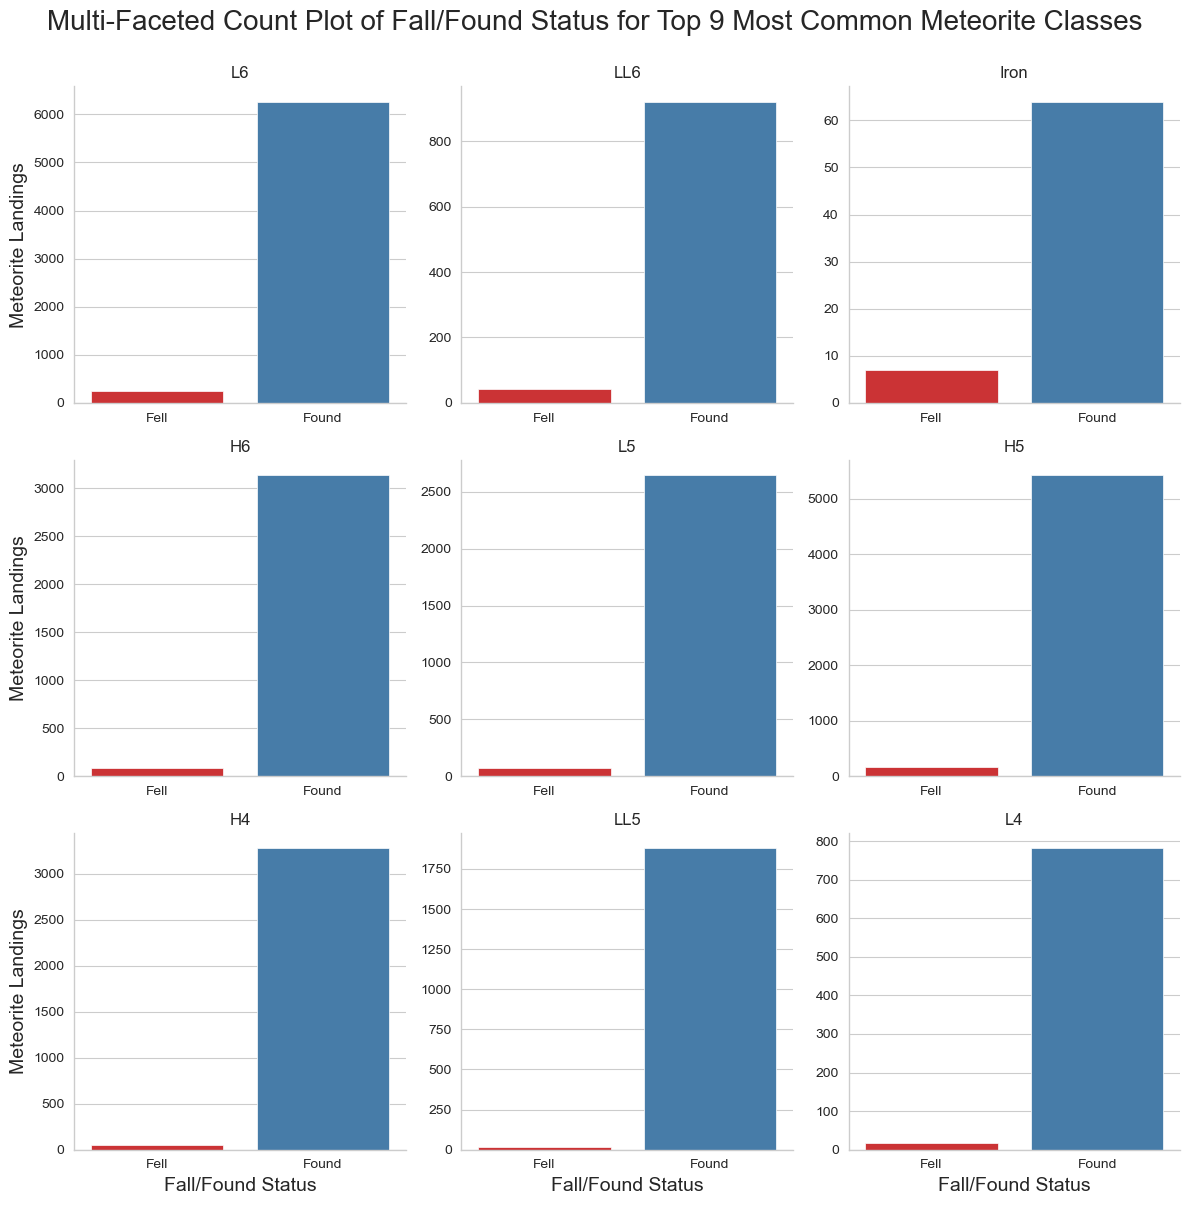

In [16]:
g = sns.FacetGrid(df_top9,
                  col='class',
                  col_wrap=3,
                  height=4,
                  sharex=False,
                  sharey=False)

g.map(sns.countplot,
      'fall_status',
      palette="Set1")

g.set_axis_labels('Fall/Found Status', 'Meteorite Landings', fontsize=14)
g.set_titles(col_template='{col_name}')
g.fig.suptitle("Multi-Faceted Count Plot of Fall/Found Status for Top 9 Most Common Meteorite Classes", fontsize=20, y=1)
g.tight_layout()

plt.show()

## Multi-Faceted Count Plot - Explanation

For the Multi-Faceted Count Plot, I was hoping to find out whether or not the amount of meteorites that are classified under the "Fell" category are comparative or vastly different to the amount of meteorites that are classified under the "Found" category.

Going into this, I did not have any preconceived expectations, so the results were surprising. For every one of the top 9 meteorite classes that the facet plot consists of, "Found" meteorites far outweigh "Fell" meteorites. At first, I wondered if this was something specific to my dataset or if there is reflective of a real-world phenomenon. As a result of this newly spurred curiosity, I researched more about Fell/Found status meteorites and discovered that "Falls" are meteorites that have fallen to Earth but were previously seen falling through the sky, either by individual people or through the assistance of cameras or other meteorite-detection technology and devices. On the other hand, "Finds" are meteorites that were not observed falling and had been lying in the ground for a longer period of time. This plot showed the rarity of "Falls" by helping to visualize just how drastic the difference between the amount of Fell and Found meteorites there are in comparison to one another across the top 9 most common meteorite classes

In addition to the rarity that "Falls" have with regard to their quantity in proportion to "Founds", they are also sought after because they allow scientists to study them in what is considered to be closer to their original shape, structure, and composition before they undergo terrestrial weathering that is often observed in "Founds" over time.

## Plot #3 - Heatmap

For the third plot in this project, I chose to create a Heatmap consisting of the number of meteorite landings for each of the top 15 most common meteorite classes from 1975 to 2000.

In [17]:
yearclass_df = meteorite_df[['year', 'class']].copy()
yearclass_df = yearclass_df[(yearclass_df['year'] >= 1975) & (yearclass_df['year'] <= 2000)]
yearclass_df

,year,class
3056,1975,L6
3057,1975,L6
3058,1975,L6
3059,1975,L6
3060,1975,L6
...,...,...
24518,2000,L6
24519,2000,L6
24520,2000,H4/5
24521,2000,L5


In [18]:
yearclass_df['count'] = 1
yearclass_df = yearclass_df.groupby(['year', 'class']).count().reset_index()
yearclass_df

,year,class,count
0,1975,CM2,2
1,1975,CO3.0,1
2,1975,CV3,1
3,1975,Diogenite,7
4,1975,EH,1
...,...,...,...
1457,2000,Mesosiderite,1
1458,2000,"Pallasite, PMG",1
1459,2000,"Pallasite, ungrouped",1
1460,2000,Ureilite,16


In [19]:
top15_classes = yearclass_df.groupby('class')['count'].sum().nlargest(15).index
top15yearclass_df = yearclass_df[yearclass_df['class'].isin(top15_classes)]
top15yearclass_df

,year,class,count
0,1975,CM2,2
10,1975,H4,13
11,1975,H4/5,1
12,1975,H5,13
14,1975,H6,18
...,...,...,...
1435,2000,L5,210
1438,2000,L6,203
1443,2000,LL4,11
1445,2000,LL5,80


In [20]:
heatmap_data = top15yearclass_df.pivot(index='class', columns='year', values='count').fillna(0)
heatmap_data

year,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
class,,,,,,,,,,,,,,,,,,,,,
CM2,2.0,1.0,1.0,1.0,22.0,0.0,4.0,6.0,6.0,27.0,...,8.0,11.0,5.0,6.0,0.0,17.0,9.0,2.0,9.0,14.0
E3,0.0,0.0,0.0,0.0,204.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H3,0.0,0.0,0.0,0.0,28.0,0.0,1.0,2.0,2.0,9.0,...,5.0,0.0,5.0,0.0,1.0,2.0,4.0,1.0,7.0,4.0
H4,13.0,2.0,50.0,22.0,709.0,10.0,68.0,45.0,20.0,39.0,...,24.0,13.0,24.0,9.0,22.0,13.0,44.0,29.0,76.0,74.0
H4/5,1.0,0.0,10.0,0.0,240.0,1.0,2.0,1.0,0.0,2.0,...,8.0,1.0,1.0,2.0,2.0,0.0,10.0,4.0,3.0,16.0
H5,13.0,6.0,176.0,83.0,361.0,31.0,159.0,46.0,90.0,105.0,...,208.0,52.0,259.0,114.0,86.0,71.0,104.0,105.0,197.0,187.0
H6,18.0,6.0,37.0,42.0,204.0,21.0,48.0,35.0,31.0,43.0,...,89.0,31.0,152.0,85.0,62.0,130.0,120.0,74.0,109.0,247.0
L3,2.0,0.0,8.0,1.0,14.0,0.0,6.0,3.0,1.0,1.0,...,0.0,1.0,2.0,0.0,4.0,1.0,1.0,1.0,5.0,8.0
L4,11.0,0.0,2.0,3.0,127.0,2.0,23.0,13.0,6.0,5.0,...,40.0,10.0,10.0,5.0,13.0,15.0,13.0,13.0,36.0,49.0


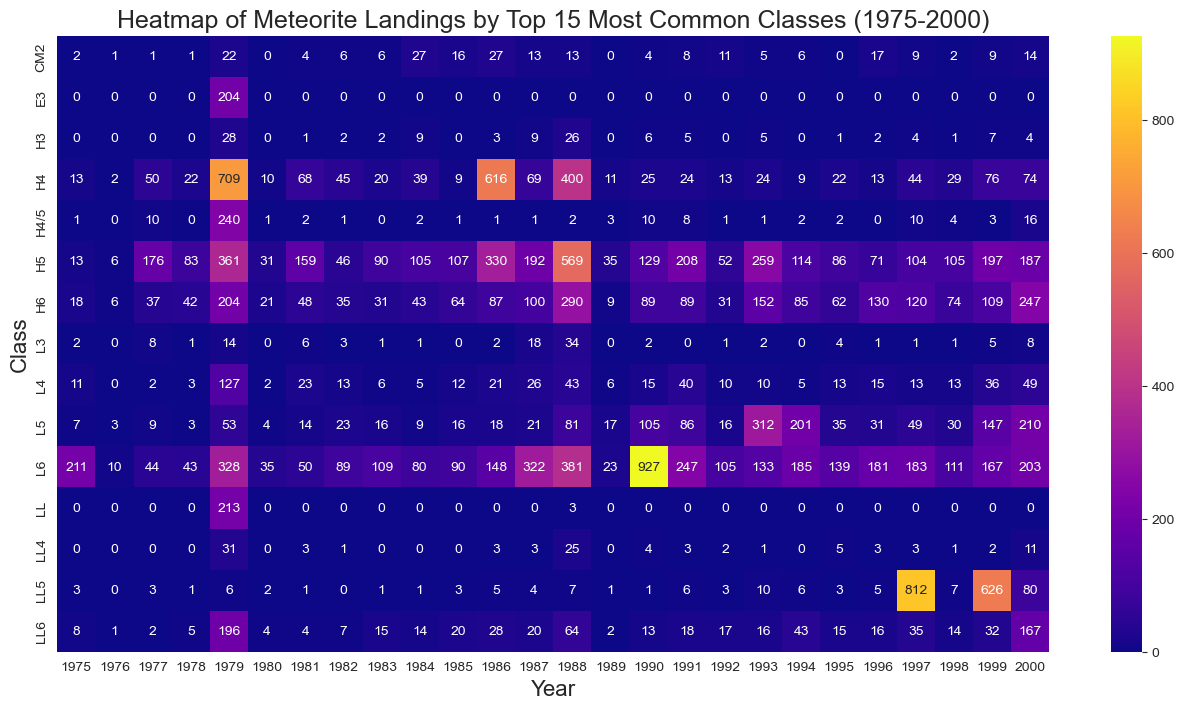

In [21]:
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, annot=True, fmt="g", cmap='plasma')
plt.title('Heatmap of Meteorite Landings by Top 15 Most Common Classes (1975-2000)', fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Class", fontsize=16)
plt.show()

## Heatmap - Explanation

When creating the Heatmap, I was hoping to create an effective visual for a viewer to look at and easily identify how many meteorites of a specific class fell during any given year from within the time period shown. I chose the "plasma" cmap for this heatmap because the color contrast works extremely well together as a visualization with brighter yellows, oranges, and purples showing higher amounts of meteorite landings being easily distinguishable from the darker blues that denote lower amounts of meteorite landings. I chose the year range between 1975 and 2000 as I wanted to vizualize data for a 25-year period.

All of that said, the plot showed exactly what I was expecting and hoping to find and allowed me to easily distinguish years and meteorite classes where an especially high amount of meteorites landed. It provided some very interesting findings that I had not known about before, like there being 927 L6 meteorites that landed in 1990 and 812 LL5 meteorites that landed in 1997. As a result, I was highly satisfied with this visualization as it allows for quick ingestion of otherwise complicated, but highly interesting information that other plots may not be as successful at delivering.

## Plot #4 - Boxplot

Building on the findings of the Heatmap, for the fourth plot in this project, I chose to create a Boxplot for a set of isolated years that contained a high amount of meteorite landings. These years included 1979, 1986, 1987, 1988, 1990, 1993, 1997, 1999, and 2000, as they stood out to me the most in the previous Heatmap and I wanted to see how a Boxplot would visualize outliers.

In [22]:
isolated_years = [1979, 1986, 1987, 1988, 1990, 1993, 1997, 1999, 2000]
isolated_df = top15yearclass_df[top15yearclass_df['year'].isin(isolated_years)]
isolated_df

,year,class,count
141,1979,CM2,22
149,1979,E3,204
162,1979,H3,28
171,1979,H4,709
172,1979,H4/5,240
...,...,...,...
1435,2000,L5,210
1438,2000,L6,203
1443,2000,LL4,11
1445,2000,LL5,80


Text(0.5, 1.0, 'Boxplot of Meteorite Landings for High-Volume Years')

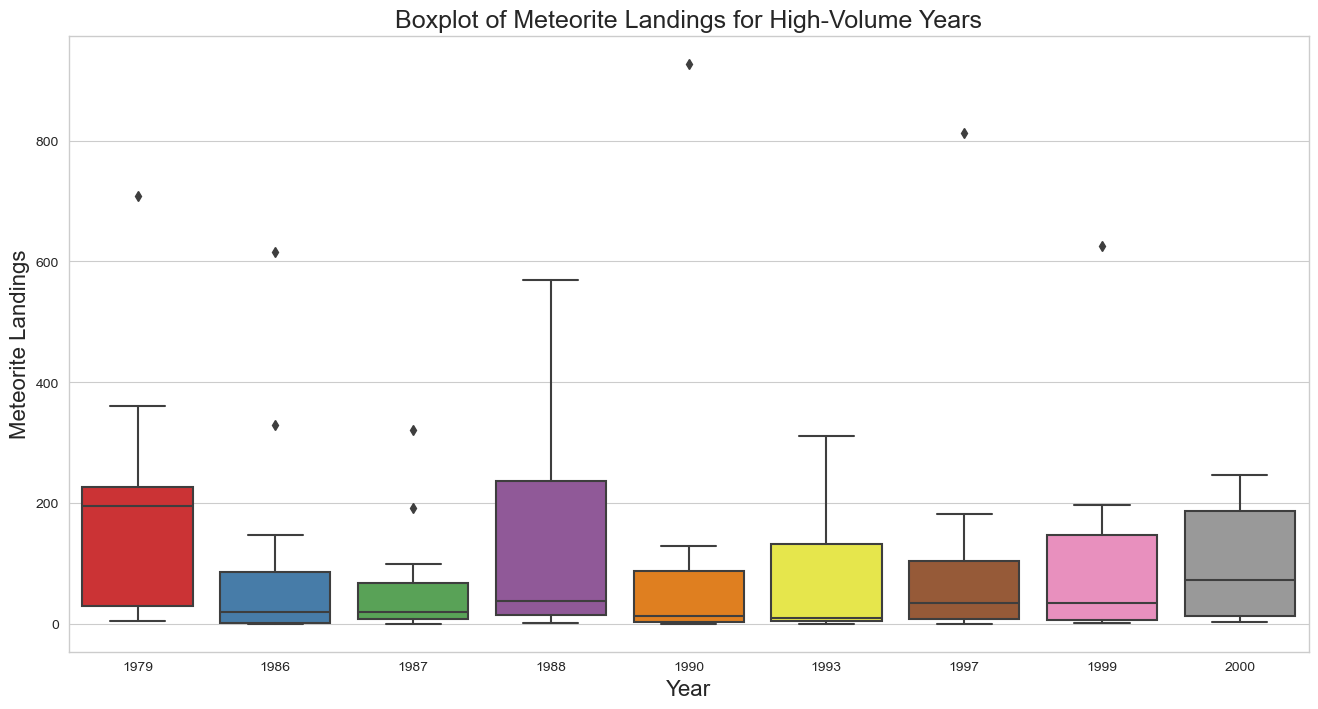

In [23]:
fig, ax = plt.subplots(figsize=(16,8))

custom_palette = sns.color_palette("Set1")
sns.boxplot(data=isolated_df, 
            x='year',
            y='count',
            palette=custom_palette,
            ax=ax
           )

ax.set_ylabel('Meteorite Landings', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_title('Boxplot of Meteorite Landings for High-Volume Years', fontsize=18)

In an effort to double check the Boxplot I created, I wrote this code to see whether or not the maximum outliers were reflecting the same data from the Heatmap for any given year.

In [24]:
year_check = isolated_df[isolated_df['year'] == 1990]

max_count_check = year_check['count'].max()

print(f"The maximum count of meteorite landings in this year is: {max_count_check}")

The maximum count of meteorite landings in this year is: 927


The code successfully returned the correct maximum values for outliers in the Boxplot wherever they were queried.

## Boxplot - Explanation

When creating the Boxplot, I was hoping to find out how it would handle high-volume years for meteorite landings based on the results of the Heatmap. I expected it to show outliers, but I was curious to see how it would differentiate them from higher values reflected as whiskers and those reflected as diamonds.

What is interesting about this Boxplot is that it actually reflects multiple outliers for certain years and does not stop at just one. I actually did not expect to see this and figured that lower outliers would be taken into account as whiskers instead. I am glad that it instead shows all outliers as diamonds as it helps improve the visualization. Another aspect of this plot that I did not expect exists in how it handled the year 1988. I expected the 569 H5 meteorite landings for that year to be considered an outlier, but this turned out not to be the case.

Overall, however, I really like this graph as it helped to create a visualization that takes into account all meteorite classes from high volume years within the 1975-2000 time period and adds even greater context to them such as lower quartile, upper quartile, min, max, median, and outliers than even the Heatmap did.

## Plot #5 - Proportion Plot - Pie Plot

For the fifth plot in this project, I chose to create a Proportion Plot as a Pie Plot for the top 9 meteorite classes based on all-time data. I did this by deriving class_counts from the df_melted dataframe which was made from the original meteorite_df which represents the loaded CSV.

In [25]:
class_counts = df_melted['class'].str.split(', ', expand=True).stack().value_counts()
top_9_classes = class_counts.head(9).index.tolist()
top_9_counts = class_counts[top_9_classes].reset_index(name='count')
print(top_9_counts)

  index  count
0    L6   6523
1    H5   5586
2    H4   3324
3    H6   3231
4    L5   2723
5   LL5   1897
6   LL6    963
7  Iron    928
8    L4    799


From there, I was able to determine proportions and create my Pie Plot.

In [26]:
category_counts = top_9_counts.set_index('index')['count']
total_data_points = top_9_counts['count'].sum()
proportions = category_counts / total_data_points
proportions

index
L6      0.251136
H5      0.215061
H4      0.127974
H6      0.124394
L5      0.104836
LL5     0.073035
LL6     0.037076
Iron    0.035728
L4      0.030762
Name: count, dtype: float64

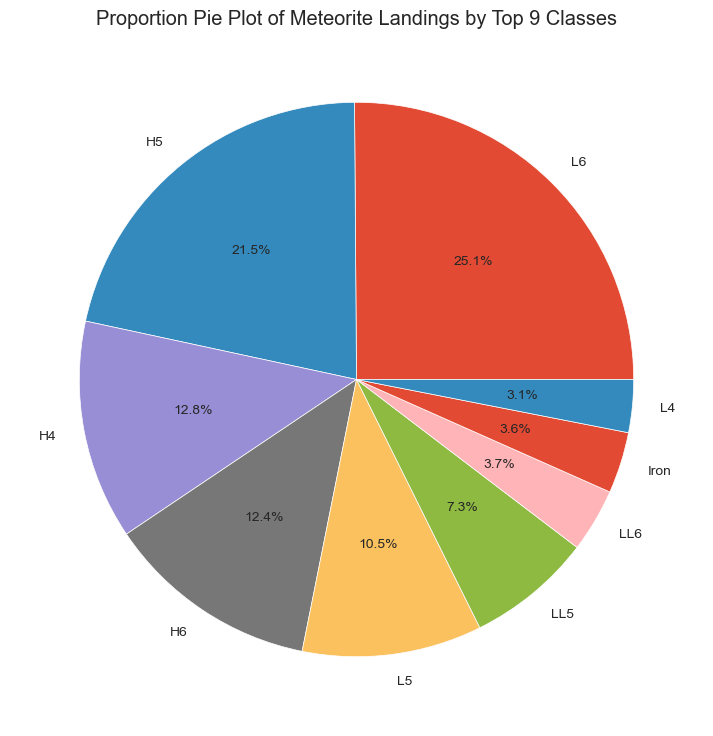

In [27]:
plt.figure(figsize=(9, 9))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=0)
plt.title('Proportion Pie Plot of Meteorite Landings by Top 9 Classes')
plt.show()

## Proportion Plot - Pie Plot - Explanation

When creating the Proportion Plot, I wanted to make a visual that could easily show the proportions of meteorite classes in a way that viewers could quickly understand them as parts of a whole across all-time data for the top 9 classes.

My expectations of this plot was a strong and straightforward visual that allowed viewers to easily tell which classes dominate the population of the top 9 that make up the most commonly documented meteorite landings. I believe that the plot lived up to this expectation, and allowed for some interesting findings to be shown as well. This being that meteorites from the H-class (H4, H5, & H6) account for nearly half (46.7%) of the meteorites found within the top 9 classes.

Overall, I was very happy with how this plot turned out as it successfuly showed the proportions of meteorite landings by top 9 classes through percentages in an easy to understand manner.

## Plot #6 - Scatter Plot

For the sixth plot in this project, I chose to create a Scatter Plot of meteorite landings between the years of 1715 and 1973. To do this, I first filtered the original df_melted dataframe by the year range I wanted and created a landings dataframe based on yearly counts. I then used this dataframe to create the Scatter Plot.

In [28]:
filtered_df = df_melted[(df_melted['year'] >= 1715) & (df_melted['year'] <= 1973)]
yearly_counts = filtered_df['year'].value_counts().sort_index()
landings_py_df = pd.DataFrame({'year': yearly_counts.index, 'count': yearly_counts.values})
landings_py_df

,year,count
0,1715,1
1,1716,1
2,1723,1
3,1724,1
4,1740,1
...,...,...
192,1969,67
193,1970,46
194,1971,47
195,1972,31


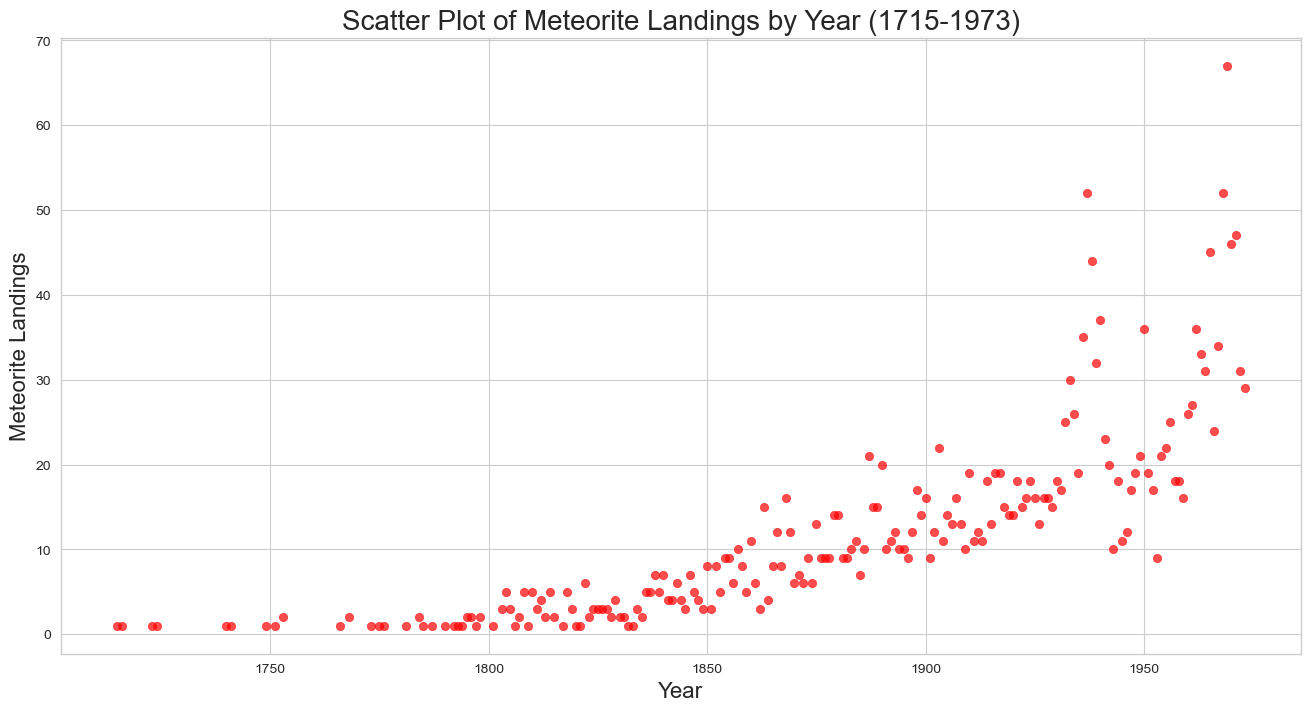

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(data=landings_py_df, x='year', y='count', alpha=0.7, color='red', edgecolor=None)

ax.set_ylabel('Meteorite Landings', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_title('Scatter Plot of Meteorite Landings by Year (1715-1973)', fontsize=20)
plt.show()

## Scatter Plot - Explanation

The Scatter Plot was an interesting one, mainly due to the timeframe it captures. The time between 1715 and 1973 is crucial within the context of this dataset as the number of meteorite landings tends to gradually increase. This is likely the result of better reporting and an increased interest in tracking meteorite landings as time went on. The time period of 1715 and 1973 was chosen deliberitely as by 1974, the number of documented meteorite landings absolutely skyrockets, likely due to the advancement of technology used for reporting along with significantly improved satellites.

To illustrate how drastic the jump in the number of documented meteorite landings truly is, I created the dataframe below which is essentially the same as the one used to create the Scatter Plot, however, it simply includes the year 1974.

In [30]:
filtered_df2 = df_melted[(df_melted['year'] >= 1715) & (df_melted['year'] <= 1974)]
yearly_counts = filtered_df2['year'].value_counts().sort_index()
landings_py_df2 = pd.DataFrame({'year': yearly_counts.index, 'count': yearly_counts.values})
landings_py_df2

,year,count
0,1715,1
1,1716,1
2,1723,1
3,1724,1
4,1740,1
...,...,...
193,1970,46
194,1971,47
195,1972,31
196,1973,29


From this, we can see that 691 meteorite landings were documented in 1974, an enormous jump in the number of landings from the previous year in 1973.

Background information aside, I was hoping to show the organic growth of the interest in meteorite landings over the course of history before drastic technological improvements truly revolutionized things.

As a result, this graph showed what I had originally expected in that over the course of time as and as more space programs were introduced, the number of documented meteorite landings went up accordingly. Interestingly enough, I don't believe it is a coincidence that the number of meteorite landings begins its upward trajectory at around the 1830's. Around that time, the United States Naval Observatory (USNO) was created for the original purpose of providing the US Navy with accurate astronomical data for navigation purposes. In 1890, the Smithsonian Astrophysical Observatory (SAO) was created to make astronomical obseravations as well. In other words, it is interesting how the increase in meteorite landings coincides with the advent of nascent astronomical institutions during this time.

Additionally, the most famous of these institutions, NASA was founded on July 29, 1958 and officially opened on October 1st of the same year. After that decade, the number of reported meteorite landings significantly picks up. This seems to indicate that as space became a more interesting topic to institutions and the general public at large, efforts to document meteorite landings increased more than they may have otherwise.

## Plot #7 - Line Plot

Lastly, for the seventh plot in this project, I created a Line Plot made up of the total mass of meteorite material that fell to Earth for every year from 1575 to 2013.

Like before, I did this by creating a filtered dataframe for that year range and making another dataframe to show the total mass for each year within that range.

In [31]:
filtered_df3 = df_melted[(df_melted['year'] >= 1575) & (df_melted['year'] <= 2013)]
mass_py_df = filtered_df3.groupby('year')['mass in kg'].sum().reset_index(name='total_mass')
mass_py_df

,year,total_mass
0,1575,50000.00000
1,1583,15.00000
2,1600,10100.00000
3,1621,1.96700
4,1623,10.40000
...,...,...
243,2009,1862.28060
244,2010,470.39588
245,2011,345.68217
246,2012,21.17590


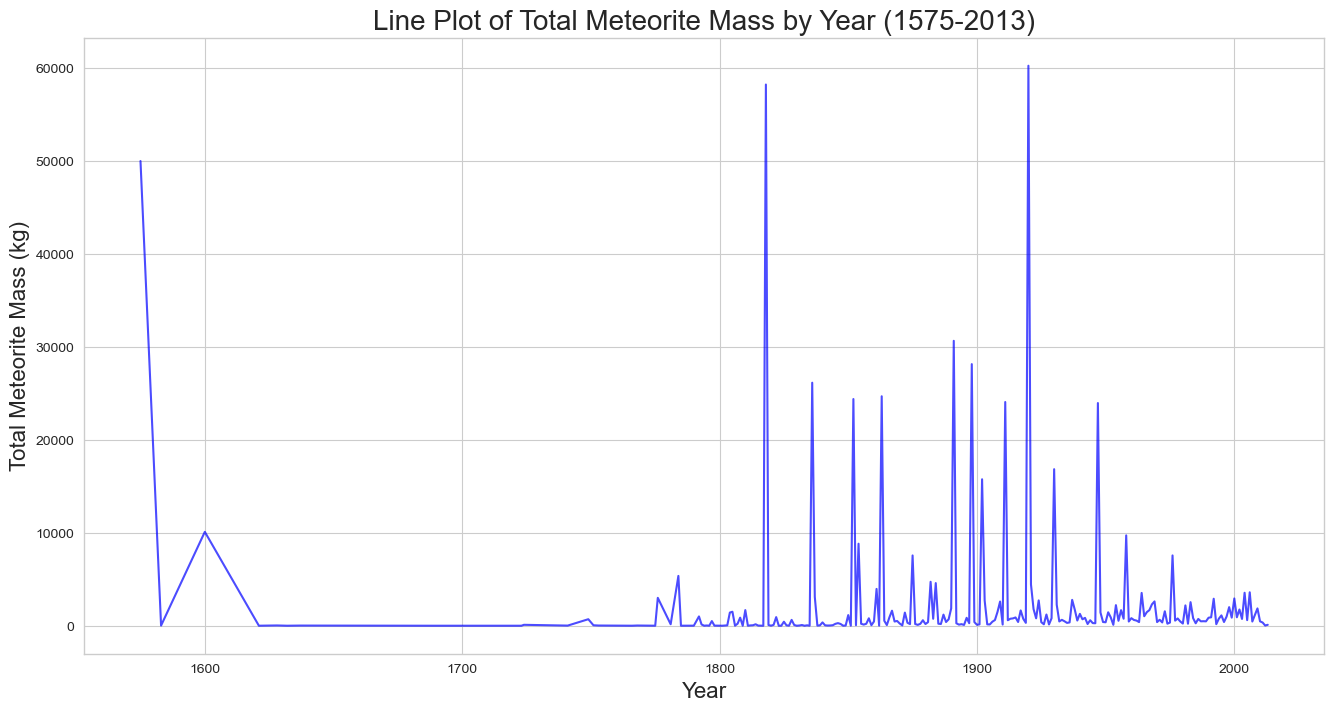

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=mass_py_df, x='year', y='total_mass', alpha=0.7, color='blue')

ax.set_ylabel('Total Meteorite Mass (kg)', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_title('Line Plot of Total Meteorite Mass by Year (1575-2013)', fontsize=20)
plt.show()

## Line Plot - Explanation

Of the plots created for this project, I found this one to be the most interesting. The reason for this is because it seems to show that the total mass of meteorite material that had landed on Earth in the comparatively distant past far exceeds the mass of meteorite material that has fallen in more recent years (1975 onward).

When creating this plot, I was hoping to figure out which years throughout history contained the most total mass of meteorites that had fallen to Earth and the results spoke for themselves. Three major spikes in this line plot that occur at around the 50,000 kg, 58,200 kg, and 60,000 kg mark showed exactly what I was looking for. The years in which these masses fell were some of the highest on record from within the landings contained in this dataset. Through my own curiosity, I wanted to find out if these total masses were contributed to by individual meteorites or by a cumulative total from multiple ones. As a result, I queried the original meteorite_df to find out the top 3 most massive meteorites and see if they were a match. My dataframe for this can be seen below.

In [33]:
top_3_index = meteorite_df['mass (kg)'].nlargest(3).index
top_3_massive_meteorites_df = meteorite_df.loc[top_3_index].reset_index(drop=True)
top_3_massive_meteorites_df

,id,name,class,mass (g),mass (kg),fall,year,latitude,longitude,GeoLocation
0,11890,Hoba,"Iron, IVB",60000000.0,60000.0,Found,1920,-19.58333,17.91667,"(-19.58333, 17.91667)"
1,5262,Cape York,"Iron, IIIAB",58200000.0,58200.0,Found,1818,76.13333,-64.93333,"(76.13333, -64.93333)"
2,5247,Campo del Cielo,"Iron, IAB-MG",50000000.0,50000.0,Found,1575,-27.46667,-60.58333,"(-27.46667, -60.58333)"


As a result, I found out that the three most massive meteorites were Hoba, Cape York, and Campo del Cielo. These meteorites fell in 1920, 1818, and 1575, respectively and reflected matching masses with those shown on the line plot for total meteorite mass. Prior to this, I was aware of Hoba, but I did not expect other meteorites to be present in this dataset that were nearly as massive as it. In other words, the Line Plot revealed more information to me than I had previously expected, showcasing how large meteorites of rarer classes can be. To further show this, I created a dataframe for the top 10 most massive meteorites in this dataset, below.

In [34]:
top_10_index = meteorite_df['mass (kg)'].nlargest(10).index
top_10_massive_meteorites_df = meteorite_df.loc[top_10_index].reset_index(drop=True)
top_10_massive_meteorites_df

,id,name,class,mass (g),mass (kg),fall,year,latitude,longitude,GeoLocation
0,11890,Hoba,"Iron, IVB",60000000.0,60000.0,Found,1920,-19.58333,17.91667,"(-19.58333, 17.91667)"
1,5262,Cape York,"Iron, IIIAB",58200000.0,58200.0,Found,1818,76.13333,-64.93333,"(76.13333, -64.93333)"
2,5247,Campo del Cielo,"Iron, IAB-MG",50000000.0,50000.0,Found,1575,-27.46667,-60.58333,"(-27.46667, -60.58333)"
3,5257,Canyon Diablo,"Iron, IAB-MG",30000000.0,30000.0,Found,1891,35.05000,-111.03333,"(35.05, -111.03333)"
4,2335,Armanty,"Iron, IIIE",28000000.0,28000.0,Found,1898,47.00000,88.00000,"(47.0, 88.0)"
5,10912,Gibeon,"Iron, IVA",26000000.0,26000.0,Found,1836,-25.50000,18.00000,"(-25.5, 18.0)"
6,5363,Chupaderos,"Iron, IIIAB",24300000.0,24300.0,Found,1852,27.00000,-105.10000,"(27.0, -105.1)"
7,16852,Mundrabilla,"Iron, IAB-ung",24000000.0,24000.0,Found,1911,-30.78333,127.55000,"(-30.78333, 127.55)"
8,23593,Sikhote-Alin,"Iron, IIAB",23000000.0,23000.0,Fell,1947,46.16000,134.65333,"(46.16, 134.65333)"
9,4919,Bacubirito,"Iron, ungrouped",22000000.0,22000.0,Found,1863,26.20000,-107.83333,"(26.2, -107.83333)"


These meteorites are reflected on the Line Plot for the years that they fell along with other meteorites that raise the overall mass totals. Nevertheless, this shows an earlier point made in the explanation of the Multi-Faceted Bar Plot that many of the supermassive meteorites come from rarer classes containing combined characteristics of iron classes within varying subgroups such as IVB, IIIAB, IAB-MG, etc. This is fascinating from a data standpoint because it indicates that further study went into the supermassive meteorites to give them subgroups in the first place when compared to more common meteorites that routinely fall and are significantly smaller. This indicates that from a research standpoint, there is far greater interest in supermassive meteorites than there are in signficiantly smaller specimens.